In [151]:
import dimers_util
from dimers_util import *
import dimers_sim
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
import matplotlib
from importlib import reload 
import pickle
from scipy.optimize import curve_fit

reload(dimers_util)
reload(dimers_sim)

<module 'dimers_sim' from 'C:\\Users\\ofir\\OneDrive - Technion\\Research - PhD\\DynamicalConfinement\\DymerKrylov\\dimers_sim.py'>

In [227]:
d_sim = [115, 95, 75, 55]
L_sim = 120
times_sim = 1500
nums_sim = 120000
simulator = dimers_sim.Simulator(L=L_sim, times=times_sim, d=d_sim, nums=nums_sim, d_procs_num=4, batch_subprocs_num=1)
r = simulator.parallel_analysis()

Starting 118, 700 | 2022_12_16__14_56
Waiting for all processes to close
0 items waiting
All processes closed
4 items waiting
Finished parallel_analysis for  L =  120, times = 1500, d = [115, 95, 75, 55], nums = 120000 | 2022_12_17__21_13


In [228]:
r[1]['rho'][:,0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

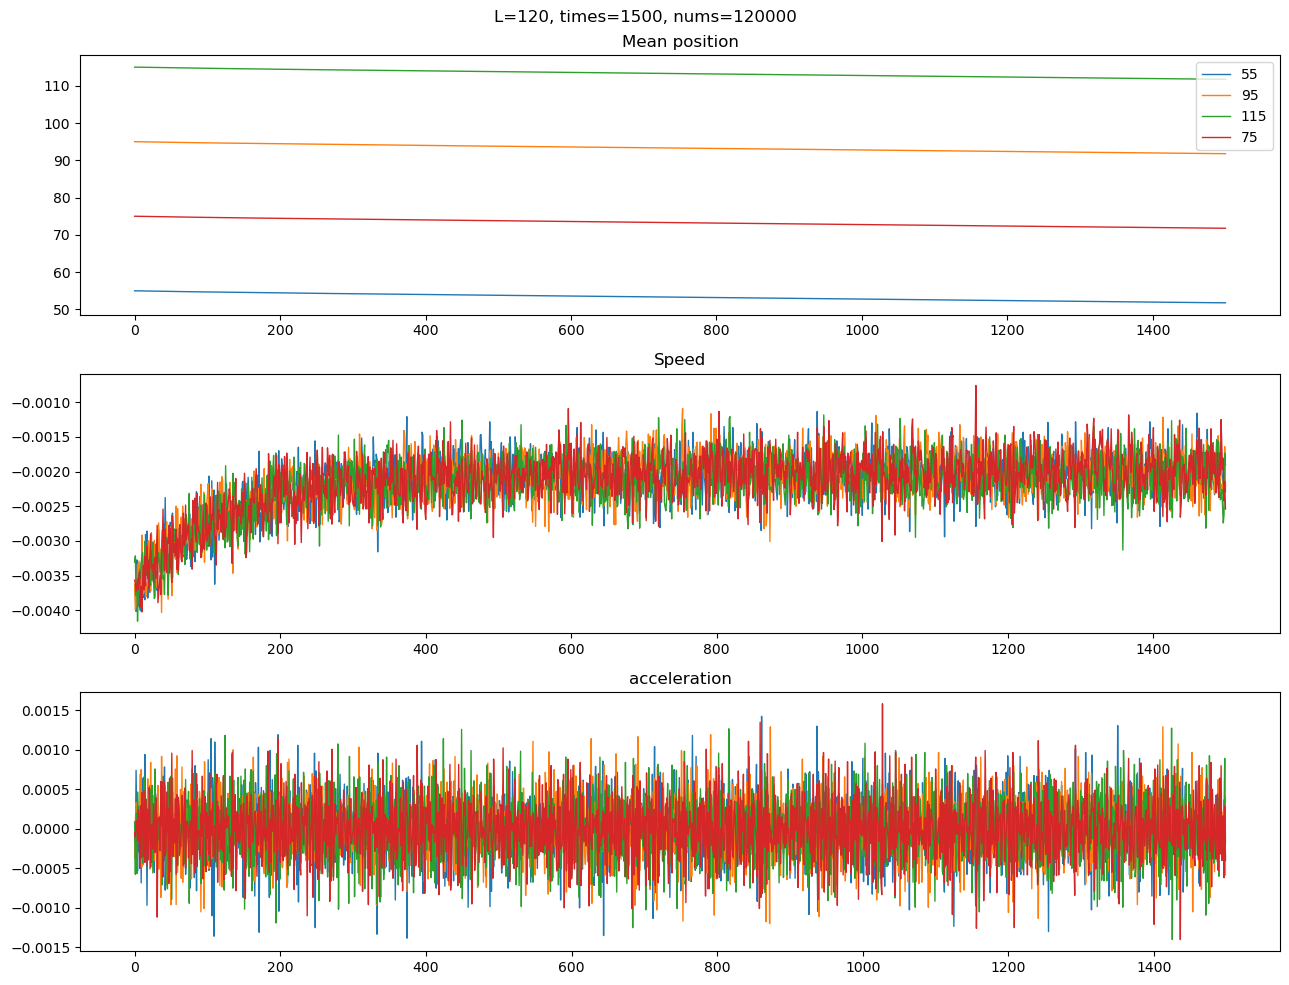

In [229]:
dimers_sim.plot_analysis(simulator.analysis_rhos, L_sim, times_sim, nums_sim, save=True)

In [230]:
simulator.nums

120000

In [214]:
with open('analyses/analysis_L120_t1500_d2022_12_14__17_49.pickle', 'rb') as f:
    ana120 = pickle.load(f)
ana120 = [ana120[0], ana120[1], ana120[3], ana120[4], ana120[2]]

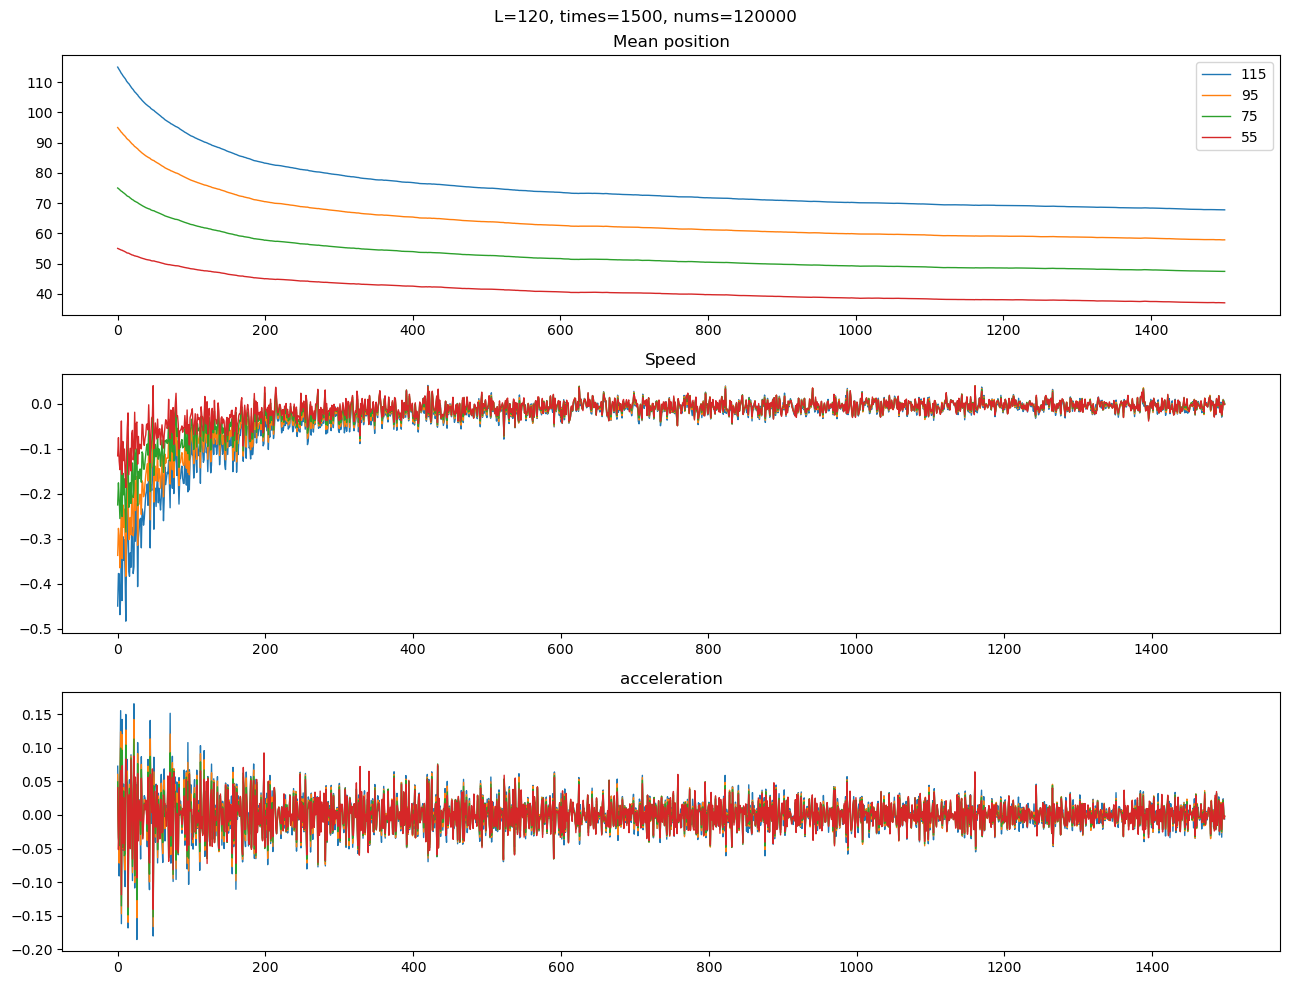

In [97]:
dimers_sim.plot_analysis(ana120, 120, 1500, 120000, save=False)

In [93]:
psi_115 = ana120[1]['Mean']
psi_95 = ana120[2]['Mean']
psi_75 = ana120[3]['Mean']
psi_55 = ana120[4]['Mean']

In [26]:
np.argwhere(psi_75 < psi_55[0])[0]

array([323], dtype=int64)

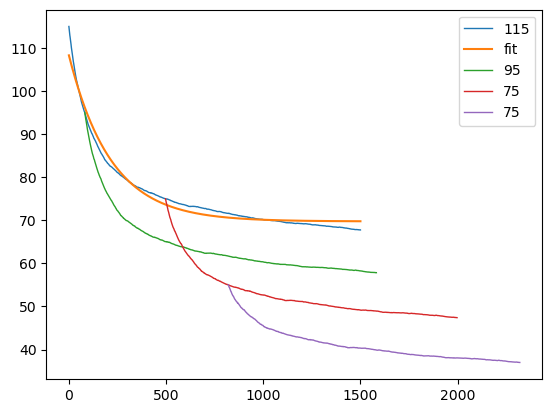

In [94]:
lwdt = 1
plt.plot(range(1501),psi_115, label='115', linewidth=lwdt)
plt.plot(range(1501), [fit_pos(t) for t in range(1501)], label='fit')
plt.plot(range(82,1583),psi_95, label='95',linewidth=lwdt)
plt.plot(range(497,1998),psi_75, label='75', linewidth=lwdt)
plt.plot(range(497+323,497+1824),psi_55, label='75',linewidth=lwdt)
plt.legend()
plt.show()

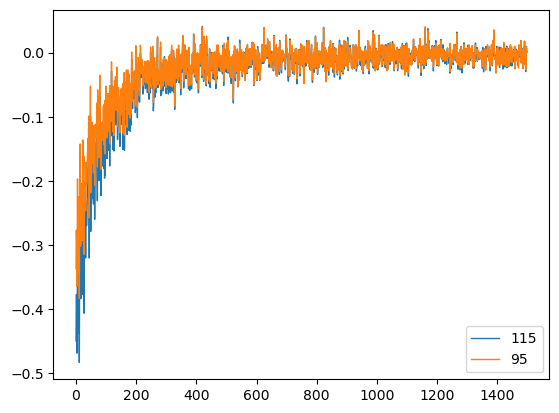

In [95]:
v_115 = ana120[1]['speed']
v_95 = ana120[2]['speed']
v_75 = ana120[3]['speed']
v_55 = ana120[4]['speed']

plt.plot(range(1500),v_115, label='115', linewidth=lwdt)
plt.plot(range(1500),v_95, label='95', linewidth=lwdt)
# plt.plot(range(497,1997),v_75, label='75')
# plt.plot(range(497+323,497+1823),v_55, label='75')
plt.legend()
plt.show()

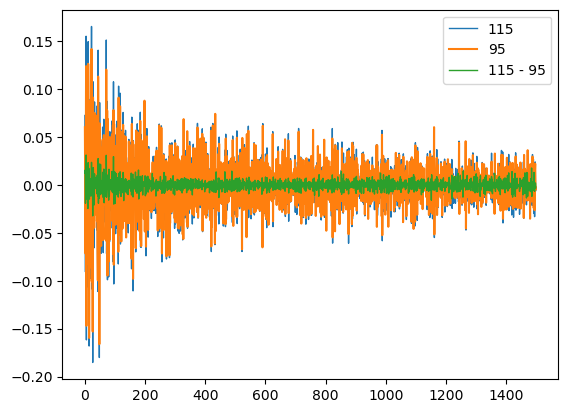

In [92]:
a_115 = ana120[1]['acc']
a_95 = ana120[2]['acc']
a_75 = ana120[3]['acc']
av_55 = ana120[4]['acc']


plt.plot(range(1499),a_115, label='115', linewidth=lwdt)
plt.plot(range(1499),a_95, label='95')
plt.plot(range(1499),a_115 - a_95, label='115 - 95', linewidth=lwdt)
# plt.plot(range(497+323,497+1823),a_55, label='75')
plt.legend()
plt.show()

In [70]:
def pos(t, a, b, c):
    return a * np.exp(-b * t) + c

def fit_pos(t):
    return 3.85593106e+01* np.exp(-4.60296610e-03 * t) + 6.97393853e+01

In [67]:
popt, pcov = curve_fit(pos, range(1501), psi_115)

C:\Users\ofir\AppData\Local\Temp\ipykernel_16376\1417860533.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * t) + c


In [1]:
type(popt)

NameError: name 'popt' is not defined

In [69]:
pcov

array([[ 3.05010468e-02,  3.59684983e-06, -9.37374592e-05],
       [ 3.59684983e-06,  1.44392115e-09,  1.21566116e-06],
       [-9.37374592e-05,  1.21566116e-06,  2.58963318e-03]])

In [90]:
np.array([[np.average(a['acc'][100*(i-1):100*i]) for i in range(1,16)] for a in ana120[1:]])

array([[ 3.81759978e-03,  1.68480664e-04, -1.27556210e-04,
         1.90075260e-04,  1.41924408e-04, -9.46014815e-05,
         3.89868400e-04, -1.69702583e-04,  3.28041160e-05,
         7.86850401e-05, -7.55666309e-06,  6.29309628e-05,
        -1.40584440e-05, -6.39735523e-05,  9.73713891e-05],
       [ 2.84557501e-03,  1.46636373e-04, -1.69882486e-04,
         1.45928862e-04,  1.56137955e-04, -9.05608864e-05,
         3.80844081e-04, -1.82109998e-04,  1.00572940e-05,
         5.81892759e-05,  5.07693228e-06,  5.31861086e-05,
         5.26326260e-05, -1.26404371e-04,  9.39631437e-05],
       [ 1.90569029e-03,  8.74424270e-05, -2.05710639e-04,
         1.31660899e-04,  1.49720319e-04, -1.30891400e-04,
         4.16153152e-04, -2.29525422e-04,  6.72367287e-06,
         5.48869184e-05,  8.12882367e-06,  6.15278209e-05,
         2.81603386e-05, -1.27969442e-04,  8.43480327e-05],
       [ 9.62950815e-04,  9.00176889e-05, -2.72652153e-04,
         9.57995206e-05,  1.45029146e-04, -1.41216473

In [74]:
for i in range(1,16):
    print(np.average(ana120[1]['speed'][100*(i-1):100*i]))

-0.22830759095234598
-0.0895134529581759
-0.03876752888412326
-0.025516810808535836
-0.018228173218810328
-0.014186863119744259
-0.008017640084362654
-0.00995037710415886
-0.008706343060137699
-0.0072928248739737
-0.005063529796220934
-0.004386536516757218
-0.004381382499131661
-0.004147462458935252
-0.005901162963051832


In [2]:
with open('analyses/analysis_L150_t6000_d2022_12_16__03_25.pickle', 'rb') as f:
    ana150 = pickle.load(f)
# ana120 = [ana120[0], ana120[1], ana120[3], ana120[4], ana120[2]]

In [39]:
for i,a in enumerate(ana150[1:-1]):
    print(i+1, type(a),a['d'])

1 <class 'dict'> 145
2 <class 'dict'> 70
3 <class 'dict'> 95
4 <class 'dict'> 120


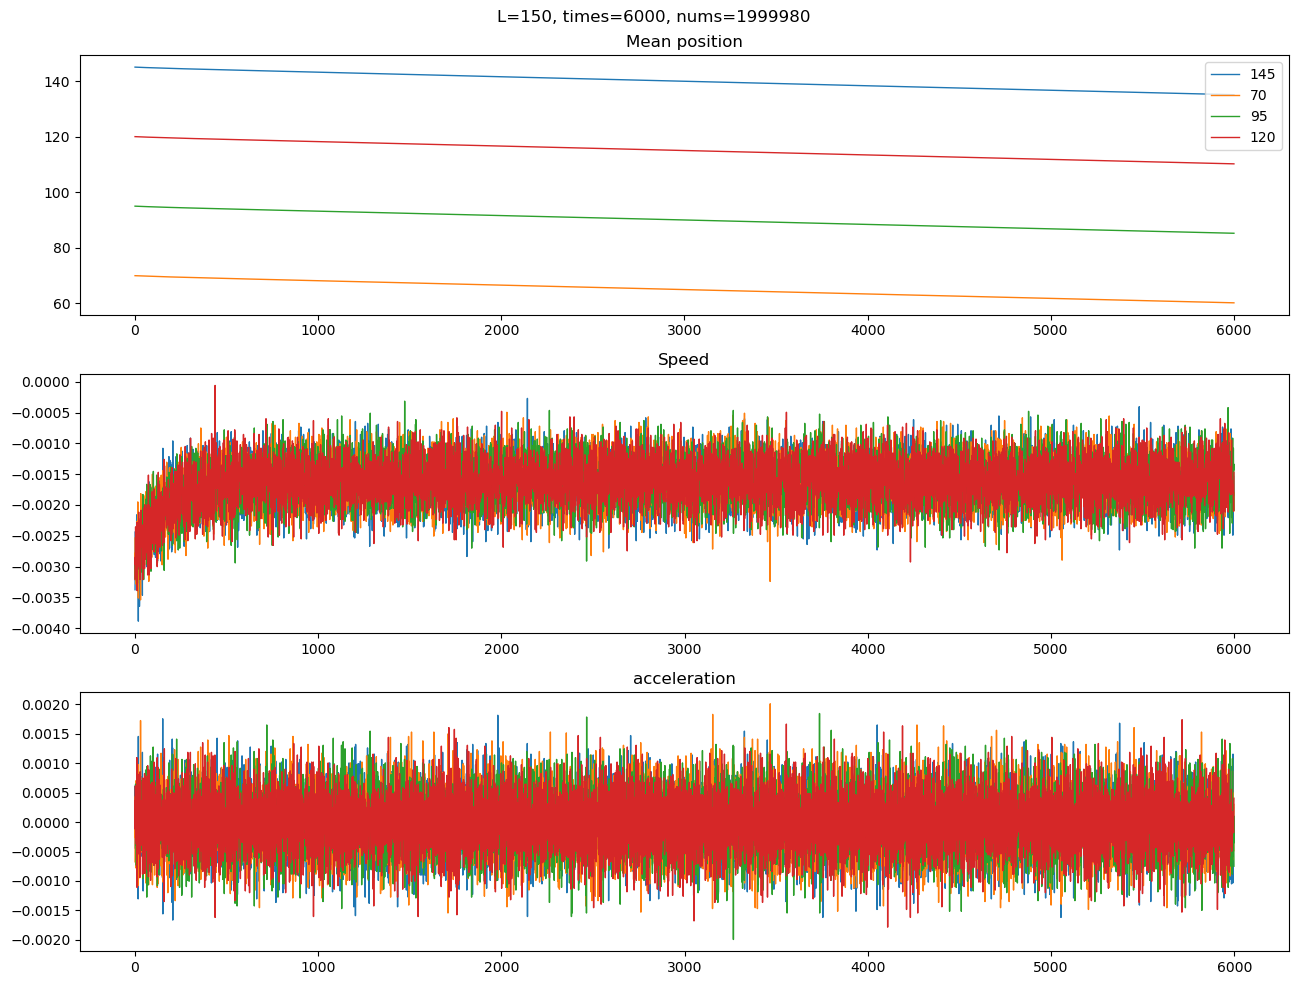

In [44]:
dimers_sim.plot_analysis(ana150, 150, 6000, 2*999990, save=False)

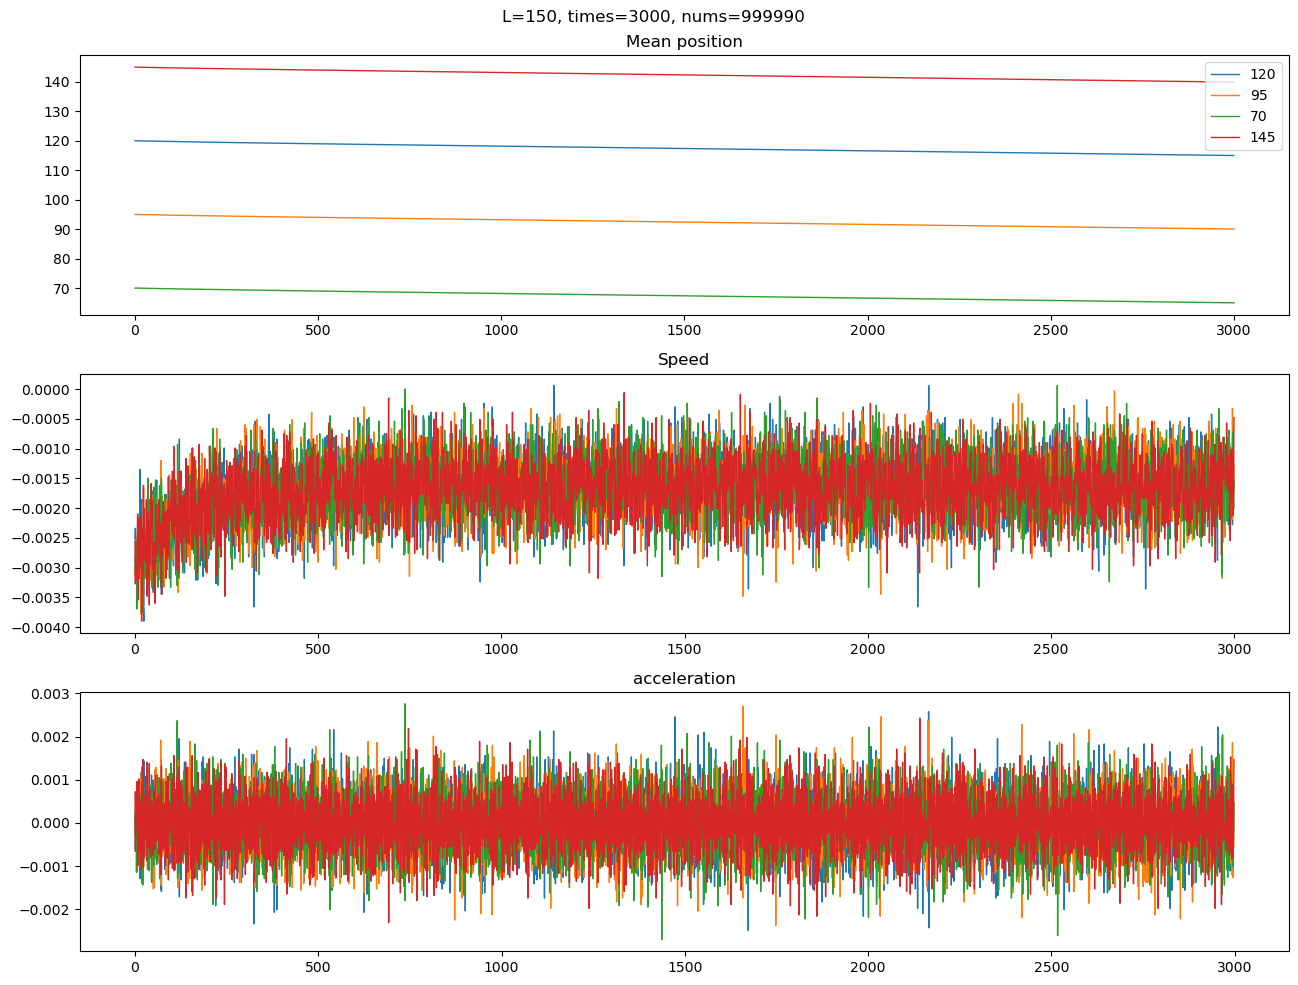

In [72]:
with open('analyses/analysis_L150_t3000_d2022_12_15__14_28.pickle', 'rb') as f:
    ana150_3000 = pickle.load(f)
dimers_sim.plot_analysis(ana150_3000, 150, 3000, 999990, save=False)

In [60]:
ana150_3000[4]['d'], ana150_3000[4]['Mean'][-1]

(145, 139.91293912939128)

In [65]:
ana150[1]['d'], ana150[1]['Mean'][-1]

(145, 135.07360573605735)

In [68]:
ana150[1]['d'], ana150[1]['Mean'][3000],

(145, 139.91019410194107)

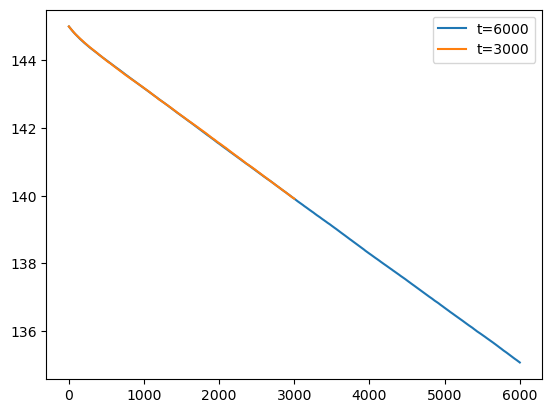

In [70]:
plt.plot(ana150[1]['Mean'], label='t=6000')
plt.plot(ana150_3000[4]['Mean'], label='t=3000')
plt.legend()
plt.show()

In [89]:
for i in range(0,4):
    print(ana150_3000[i]['d'])

145
120
95
70


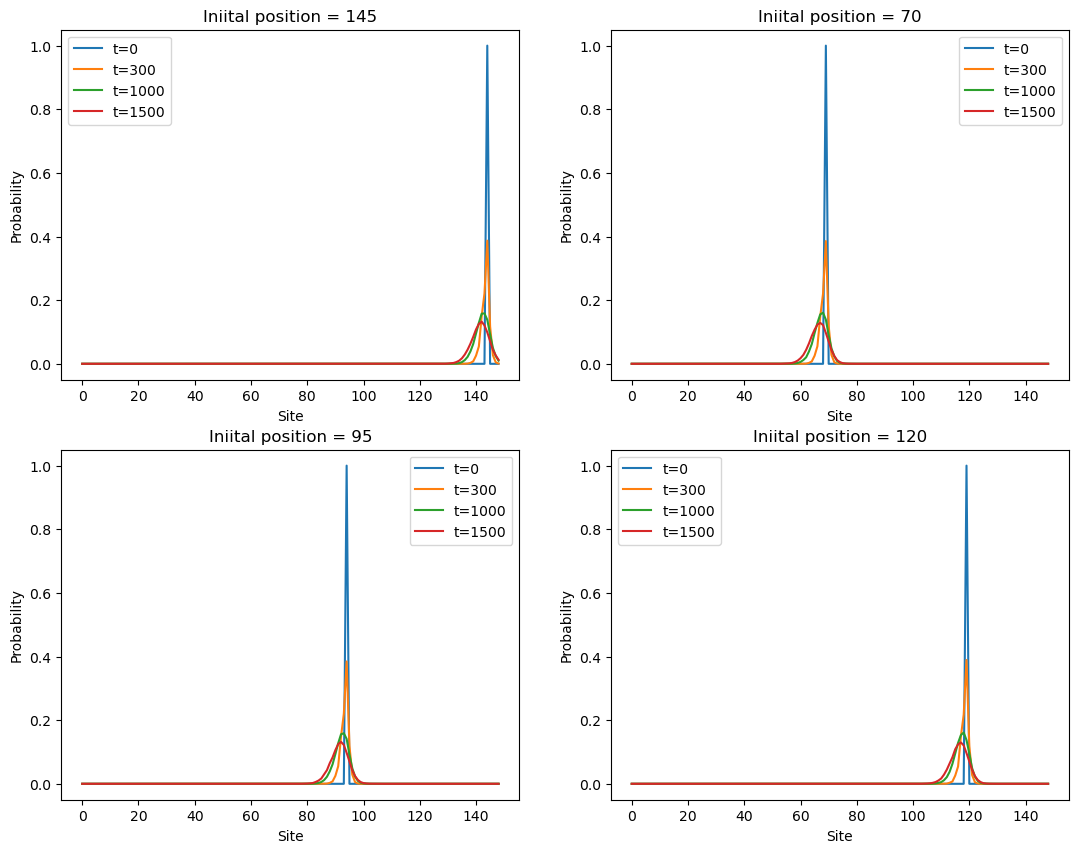

In [223]:
def plot_dist(ana, t):

    fig, ax = plt.subplots(2,2, figsize=(13, 10))
    row =[0, 0, 1, 1]
    col = [0, 1, 0 ,1]
    L = ana[0]['rho'].shape[1]
    x= range(L - 1)
    for i in range(4):
        for t in times:
            ax[row[i], col[i]].plot(x, ana[i]['rho'][t, 1:], label='t={}'.format(t))
            ax[row[i], col[i]].set_title("Iniital position = {}".format(ana[i]['d']))
            ax[row[i], col[i]].legend()
            ax[row[i], col[i]].set_xlabel('Site')
            ax[row[i], col[i]].set_ylabel('Probability')
    plt.savefig('figs/position_distribution_over_t_L{}.png'.format(L))
    plt.show()
times = [0, 300, 1000,1500]
plot_dist(ana150[1:], times)

In [226]:
ana120[4]['rho'][:,0]

array([1.    , 0.9944, 0.9893, 0.985 , 0.9794, 0.9737, 0.9695, 0.9645,
       0.9607, 0.9567, 0.953 , 0.9489, 0.9434, 0.9391, 0.9347, 0.9312,
       0.9271, 0.9222, 0.9177, 0.9135, 0.9094, 0.905 , 0.8999, 0.8947,
       0.8911, 0.8869, 0.8823, 0.8785, 0.8728, 0.868 , 0.8644, 0.8608,
       0.8572, 0.8524, 0.8482, 0.8439, 0.8397, 0.836 , 0.8326, 0.8296,
       0.8262, 0.8231, 0.8192, 0.8159, 0.8124, 0.8079, 0.8053, 0.8015,
       0.7987, 0.7954, 0.7911, 0.7883, 0.7847, 0.7806, 0.778 , 0.7751,
       0.7714, 0.7681, 0.7641, 0.7604, 0.7568, 0.7542, 0.7512, 0.747 ,
       0.7433, 0.741 , 0.7372, 0.7338, 0.7312, 0.7283, 0.7247, 0.7215,
       0.7173, 0.7155, 0.7126, 0.7092, 0.7066, 0.7035, 0.7006, 0.6972,
       0.6947, 0.691 , 0.6886, 0.6852, 0.6817, 0.6786, 0.6755, 0.6728,
       0.6702, 0.6672, 0.6635, 0.6598, 0.6573, 0.6543, 0.6509, 0.6478,
       0.6439, 0.6426, 0.6395, 0.6366, 0.6339, 0.6324, 0.6293, 0.6272,
       0.6242, 0.6214, 0.6195, 0.6176, 0.6149, 0.6128, 0.6105, 0.6078,
      

In [113]:
hop=get_h_hop(120)

In [115]:
L=120

i = np.arange(0,L);

hop1 = np.stack([3 * ((i + 3) % L) + 0, 3 * ((i + 2) % L) + 2, 3 * ((i + 3) % L) + 2,
                 3 * ((i + 2) % L) + 1, 3 * ((i + 2) % L) + 0, 3 * ((i + 1) % L) + 1]).T

hop2 = np.stack([3 * ((i + 3) % L) + 0, 3 * ((i + 2) % L) + 2, 3 * ((i + 3) % L) + 2,
                 3 * ((i + 3) % L) + 1, 3 * ((i + 4) % L) + 0, 3 * ((i + 4) % L) + 1]).T

hop3 = np.stack([3 * ((i + 2) % L) + 0, 3 * ((i + 1) % L) + 1, 3 * ((i + 2) % L) + 1,
                 3 * ((i + 1) % L) + 2, 3 * ((i + 1) % L) + 0, 3 * (i % L) + 2]).T

hop4 = np.stack([3 * ((i + 1) % L) + 0, 3 * (i % L) + 1,       3 * ((i + 1) % L) + 1,
                 3 * ((i + 1) % L) + 2, 3 * ((i + 2) % L) + 0, 3 * ((i + 2) % L) + 2]).T

hop5 = np.stack([3 * ((i + 2) % L) + 1, 3 * ((i + 3) % L) + 0, 3 * ((i + 3) % L) + 1,
                 3 * ((i + 1) % L) + 1, 3 * ((i + 0) % L) + 1, 3 * ((i + 1) % L)]).T

hop6 = np.stack([3 * ((i + 2) % L) + 2, 3 * ((i + 3) % L) + 0, 3 * ((i + 3) % L) + 2,
                 3 * ((i + 1) % L) + 2, 3 * ((i + 0) % L) + 2, 3 * ((i + 1) % L)]).T

hops = np.vstack((hop1, hop2, hop3, hop4, hop5, hop6))
h_hops = np.delete(hops, np.any(hops <= 2, axis=1), axis=0)


In [143]:
hops[117]

array([  0, 359,   2, 358, 357, 355], dtype=int32)

In [142]:
np.argwhere(np.any(hops <= 2, axis=1))

array([[117],
       [118],
       [119],
       [236],
       [237],
       [238],
       [240],
       [358],
       [359],
       [360],
       [478],
       [479],
       [480],
       [597],
       [598],
       [599],
       [600],
       [717],
       [718],
       [719]], dtype=int64)

In [126]:
np.argwhere(h_hops == L)

array([[ 37,   0],
       [ 38,   4],
       [153,   4],
       [154,   0],
       [271,   0],
       [272,   4],
       [388,   4],
       [389,   0],
       [504,   1],
       [506,   5],
       [620,   1],
       [622,   5]], dtype=int64)

In [128]:
i

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119])